### Alpha Diversity Measures

In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

#### Fecal Samples Pre- and Post-antibiotic Treatment

In [3]:
#Read in Data

AllFecal_nt = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/AllFecal_nt.rds")
dissections_nt = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/dissections_nt.rds")

#Fecal_PreRX = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_PreRX_nt.rds")
#Fecal_RX1 = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_RX1_nt.rds")
#Fecal_RX2 = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_RX2_nt.rds")
#Fecal_PostRX = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/FecalSamples/Fecal_PostRX_nt.rds")


In [39]:
diss_nocontam_nt = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/dissec_nt_top30contam_remove.rds")
diss_nocontam_nt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2864 taxa and 158 samples ]
sample_data() Sample Data:       [ 158 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 2864 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2864 tips and 2863 internal nodes ]

In [4]:
x = otu_table(diss_nocontam_nt)
write.csv(x, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/dissections_table_t30nocontam.otu.csv")

In [11]:
otu_table = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/dissections_table.otu.csv")
tax_table = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/dissections_table.tax.csv")

In [12]:
dissections = left_join(otu_table, tax_table, by="OTUID")

In [13]:
write.csv(dissections, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/dissections_reads.csv")

### Shannon Diversity Calculations

In [5]:
sample_tab = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/phyloseq_files/cuttlefish_mappingfile.csv")

In [6]:
#Fecal_PostRX

sha = estimate_richness(Fecal_PostRX, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = left_join(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Group") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Group")

stats = dfsha %>%
    group_by(Group) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(mean))
stats

Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining character vector and factor, coercing into character vector”

Group,median,mean,sd,sem
Control,2.382700,2.359422,0.7696744,0.09696986
Treatment,3.106481,3.173281,1.2537862,0.11305009


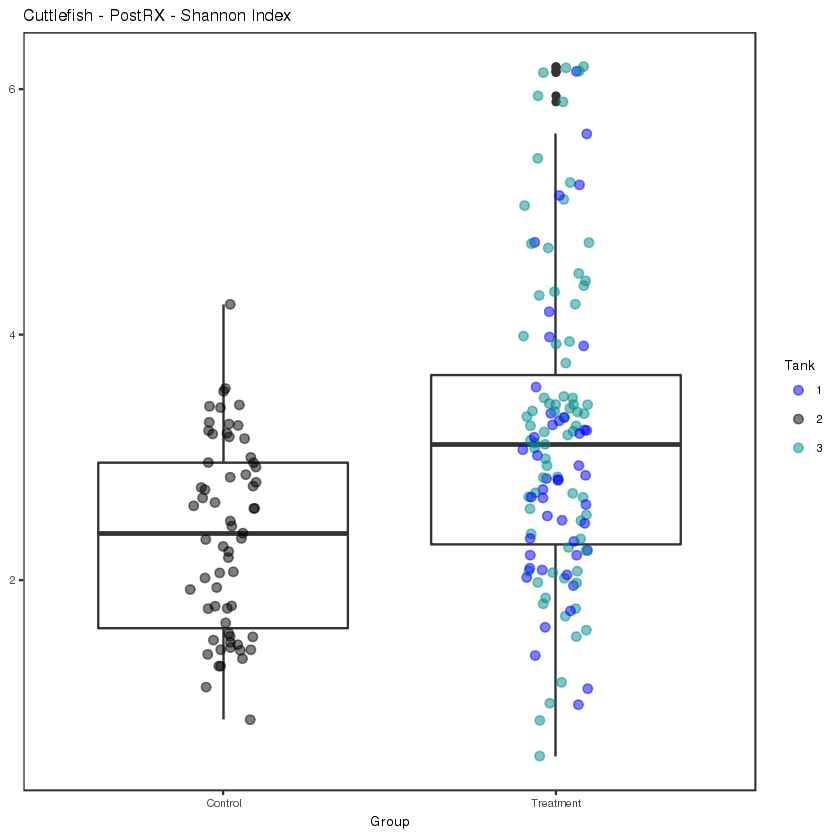

In [13]:
dfsha$Tank = as.factor(dfsha$Tank)

p = ggplot(na.omit(dfsha), aes(x = Group, y = Shannon)) + ggtitle("Cuttlefish - PostRX - Shannon Index") 

p = p + geom_boxplot() + ylab("Shannon")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

#p = p + scale_y_continuous(limits = c(0,1200))

p = p + geom_point(size = 2,alpha=.5, aes(color = Tank),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_manual(values=c("blue", "black", "cyan4"))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

#p = p + facet_wrap(~Host_Family)

p

In [32]:
t.test(Shannon ~ Group, data=dfsha) 


	Welch Two Sample t-test

data:  Shannon by Group
t = -5.4643, df = 177.98, p-value = 1.55e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1077772 -0.5199413
sample estimates:
  mean in group Control mean in group Treatment 
               2.359422                3.173281 


In [64]:
dfsha$Group=as.factor(dfsha$Group)
kruskal = kruskal.test(Shannon~Group, data=dfsha)
kruskal


	Kruskal-Wallis rank sum test

data:  Shannon by Group
Kruskal-Wallis chi-squared = 19.551, df = 1, p-value = 9.797e-06


In [16]:
#Fecal_PreRX

Fecal_PreRX.sha = estimate_richness(Fecal_PreRX, split = TRUE, measures = "Shannon")
Fecal_PreRX.sha$SampleID = rownames(Fecal_PreRX.sha)

Fecal_PreRX.dfsha = left_join(Fecal_PreRX.sha, sample_tab, on="SampleID")

Fecal_PreRX.ordsha = sha %>% group_by("Group") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Group")

stats = Fecal_PreRX.dfsha %>%
    group_by(Group) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(mean))
stats

Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining character vector and factor, coercing into character vector”

Group,median,mean,sd,sem
Treatment,2.323495,2.691736,1.506636,0.1883295
Control,2.471361,2.739220,1.071106,0.1893465


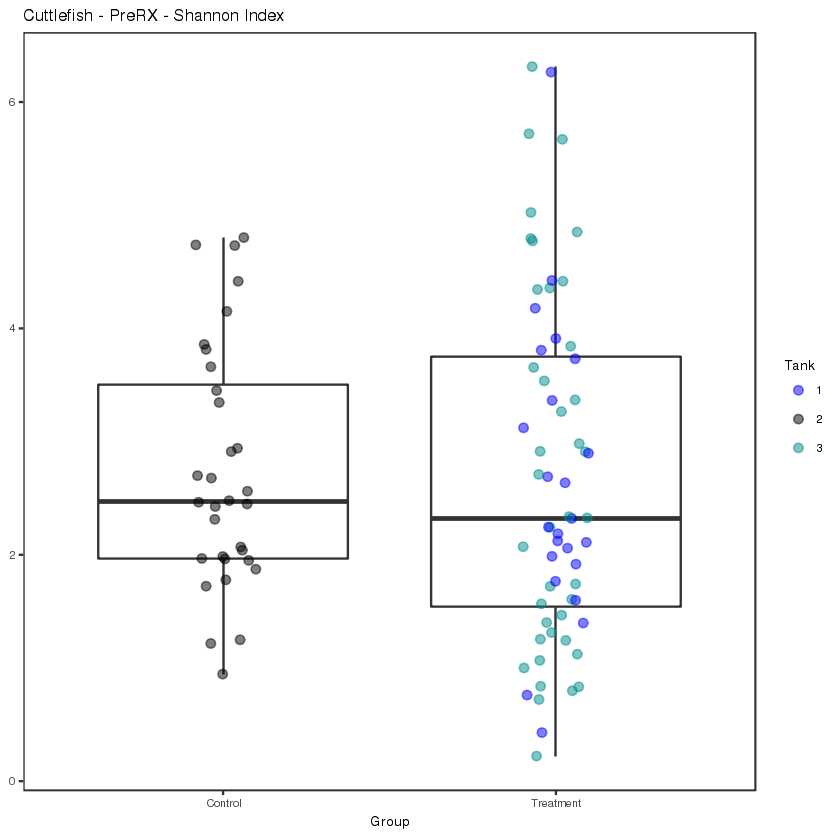

In [18]:
Fecal_PreRX.dfsha$Tank = as.factor(Fecal_PreRX.dfsha$Tank)

p = ggplot(na.omit(Fecal_PreRX.dfsha), aes(x = Group, y = Shannon)) + ggtitle("Cuttlefish - PreRX - Shannon Index") 

p = p + geom_boxplot() + ylab("Shannon")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

#p = p + scale_y_continuous(limits = c(0,1200))

p = p + geom_point(size = 2,alpha=.5, aes(color = Tank),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_manual(values=c("blue", "black", "cyan4"))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           #legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

#p = p + facet_wrap(~Host_Family)

p

In [33]:
t.test(Shannon ~ Group, data=Fecal_PreRX.dfsha) 


	Welch Two Sample t-test

data:  Shannon by Group
t = 0.1778, df = 82.8, p-value = 0.8593
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4837034  0.5786709
sample estimates:
  mean in group Control mean in group Treatment 
               2.739220                2.691736 


In [65]:
Fecal_PreRX.dfsha$Group=as.factor(Fecal_PreRX.dfsha$Group)
kruskal = kruskal.test(Shannon~Group, data=Fecal_PreRX.dfsha)
kruskal


	Kruskal-Wallis rank sum test

data:  Shannon by Group
Kruskal-Wallis chi-squared = 0.28759, df = 1, p-value = 0.5918


In [ ]:
saveRDS(dfsha_density, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/dfsha_density.rds")

### Observed Diversity Calculations

In [90]:
head(Fecal_postRX.obv)

X,Observed,SampleID
19.10.4,100,19.10.4
20.10.6,163,20.10.6
18.10.4,101,18.10.4
4.10.7,199,4.10.7
11.10.6,168,11.10.6
3.10.9,192,3.10.9


In [20]:
Fecal_postRX.obv = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/Fecal_postRX.obv.csv")

In [21]:
#Fecal_PostRX

#Fecal_postRX.obv = estimate_richness(Fecal_PostRX, split = TRUE, measures = "Observed")
#Fecal_postRX.obv$SampleID = rownames(Fecal_postRX.obv)
#### For some reason these lines were introducing "X"s in front of SampleID values and messing everything up
#### Had to export csv, manually remove Xs, then re-read in...continuing below

Fecal_postRX.dfobv = left_join(Fecal_postRX.obv, sample_tab, on="SampleID")

Fecal_postRX.ordobv = Fecal_postRX.obv %>% group_by("Group") %>%
    summarize(med.obv = median(Observed)) %>%
    arrange(desc(med.obv)) %>%
    magrittr::extract2("Group")

stats = Fecal_postRX.dfobv %>%
    group_by(Group) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining factors with different levels, coercing to character vector”

Group,median,mean,sd,sem
Control,201,199.3333,85.69978,10.79716
Treatment,310,403.8455,292.35805,26.36104


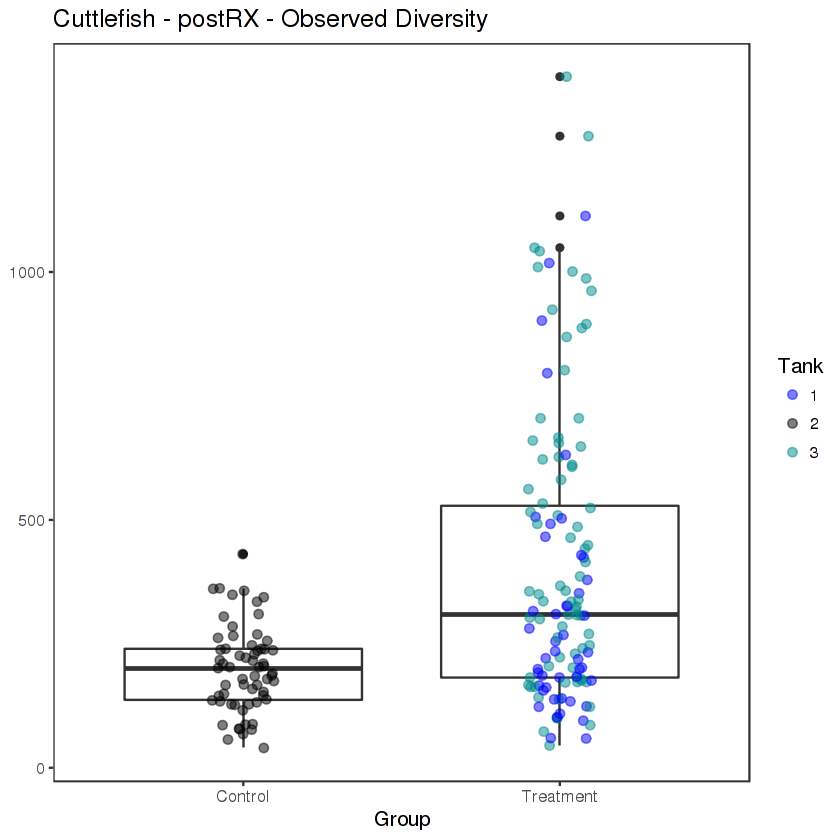

In [23]:
# BOX PLOT

Fecal_postRX.dfobv$Tank = as.factor(Fecal_postRX.dfobv$Tank)

p = ggplot(na.omit(Fecal_postRX.dfobv), aes(x = Group, y = Observed)) + ggtitle("Cuttlefish - postRX - Observed Diversity")

p = p + geom_boxplot() + ylab("# of Observed OTUs") #+ coord_flip()

p = p + geom_point(size = 2,alpha=.5, aes(color = Tank),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_manual(values=c("blue", "black", "cyan4"))


#p = p + geom_point(size = .75, position = position_jitter(h = 0, w = 0.2))


p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           legend.position = "right",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p

In [127]:
Fecal_postRX.dfobv$Group=as.factor(Fecal_postRX.dfobv$Group)

kruskal.test(Observed~Group, data=Fecal_postRX.dfobv)

pairwise.wilcox.test(Fecal_postRX.dfobv$Observed, Fecal_postRX.dfobv$Group, p.adjust.method="bonf")

t.test(Observed ~ Group, data=Fecal_postRX.dfobv) 


	Kruskal-Wallis rank sum test

data:  Observed by Group
Kruskal-Wallis chi-squared = 24.472, df = 1, p-value = 7.542e-07



	Pairwise comparisons using Wilcoxon rank sum test 

data:  Fecal_postRX.dfobv$Observed and Fecal_postRX.dfobv$Group 

          Control
Treatment 7.6e-07

P value adjustment method: bonferroni 


	Welch Two Sample t-test

data:  Observed by Group
t = -7.1793, df = 157.64, p-value = 2.6e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -260.7767 -148.2477
sample estimates:
  mean in group Control mean in group Treatment 
               199.3333                403.8455 


In [24]:
Fecal_PreRX.obv = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/Fecal_PreRX.obv.csv")
head(Fecal_PreRX.obv)

X,Observed,SampleID
20.9.30,366,20.9.30
5.9.28,233,5.9.28
18.9.29,1310,18.9.29
15.9.29,242,15.9.29
23.9.27,76,23.9.27
6.9.28,179,6.9.28


In [25]:
#Fecal_PreRX

#Fecal_PreRX.obv = estimate_richness(Fecal_PreRX, split = TRUE, measures = "Observed")
#Fecal_PreRX.obv$SampleID = rownames(Fecal_PreRX.obv)
#### For some reason these lines were introducing "X"s in front of SampleID values and messing everything up
#### Had to export csv, manually remove Xs, then re-read in...continuing below

Fecal_PreRX.obv = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/Fecal_PreRX.obv.csv")

Fecal_PreRX.dfobv = left_join(Fecal_PreRX.obv, sample_tab, on="SampleID")

Fecal_PreRX.ordobv = Fecal_PreRX.obv %>% group_by("Group") %>%
    summarize(med.obv = median(Observed)) %>%
    arrange(desc(med.obv)) %>%
    magrittr::extract2("Group")

stats = Fecal_PreRX.dfobv %>%
    group_by(Group) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(mean))
stats

Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining factors with different levels, coercing to character vector”

Group,median,mean,sd,sem
Control,280.5,303.0625,209.7081,37.07150
Treatment,223.0,334.7812,299.3786,37.42232


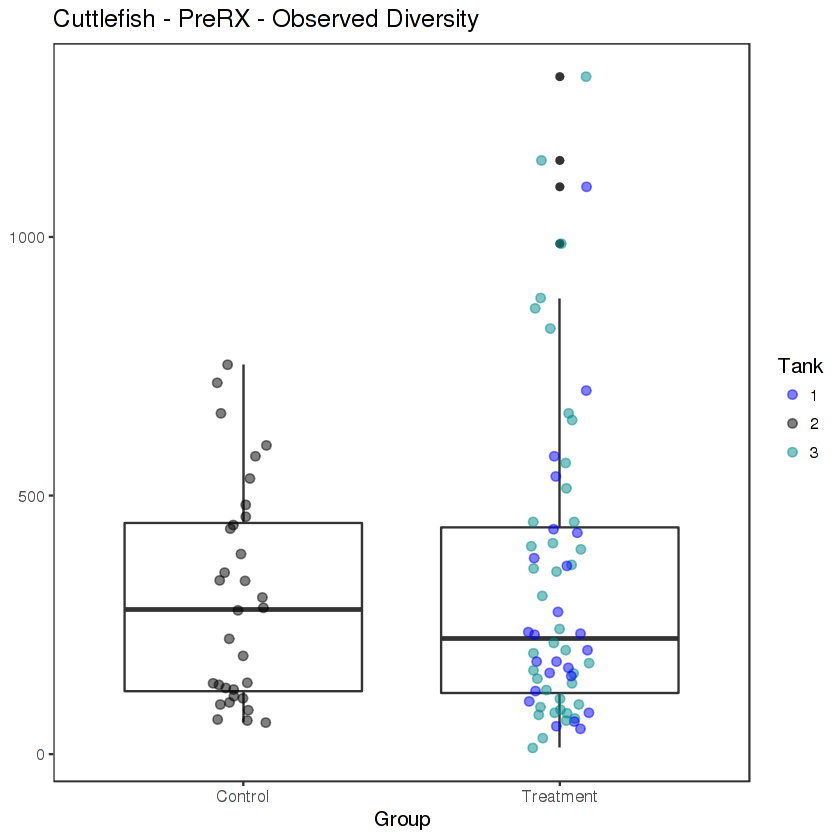

In [28]:
Fecal_PreRX.dfobv$Tank = as.factor(Fecal_PreRX.dfobv$Tank)

p = ggplot(na.omit(Fecal_PreRX.dfobv), aes(x = Group, y = Observed)) + ggtitle("Cuttlefish - PreRX - Observed Diversity")

p = p + geom_boxplot() + ylab("# of Observed OTUs") #+ coord_flip()

p = p + geom_point(size = 2,alpha=.5, aes(color = Tank),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_manual(values=c("blue", "black", "cyan4"))

#p = p + scale_color_manual(values=c("#9999CC","#CC6666", "#66CC99"))

#p = p + geom_point(size = .75, position = position_jitter(h = 0, w = 0.2))


p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           #legend.position = "right",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
p


In [31]:
Fecal_PreRX.dfobv$Group=as.factor(Fecal_PreRX.dfobv$Group)

aov(Observed~Group, data=Fecal_PreRX.dfobv)

#pairwise.wilcox.test(Fecal_PreRX.dfobv$Observed, Fecal_PreRX.dfobv$Group, p.adjust.method="bonf")

t.test(Observed ~ Group, data=Fecal_PreRX.dfobv) 

Call:
   aov(formula = Observed ~ Group, data = Fecal_PreRX.dfobv)

Terms:
                  Group Residuals
Sum of Squares    21463   7009837
Deg. of Freedom       1        94

Residual standard error: 273.0801
Estimated effects may be unbalanced


	Welch Two Sample t-test

data:  Observed by Group
t = -0.60215, df = 83.635, p-value = 0.5487
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -136.47678   73.03928
sample estimates:
  mean in group Control mean in group Treatment 
               303.0625                334.7812 


#### Dissected Samples - Control vs Treatment Animals

In [130]:
#Read in Data

Cecum_nt = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Cecum_nt.rds")
Digestive_gland_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Digestive_gland_nt.rds")
Esophagus_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Esophagus_nt.rds")
Gills_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Gill_nt.rds")
Kidney_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Kidney_nt.rds")
Intestine_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Intestine_nt.rds")
Skin_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Skin_nt.rds")
Stomach_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Stomach_nt.rds")

#Experimental Controls
Water_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Water_nt.rds")
Shrimp_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Shrimp_nt.rds")
Fecal_nt= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Fecal_nt.rds")

In [131]:
all_tissues = merge_phyloseq(Cecum_nt,Digestive_gland_nt,Esophagus_nt,Gills_nt,Kidney_nt,Intestine_nt,Stomach_nt,Skin_nt)
GI_tract = merge_phyloseq(Cecum_nt,Esophagus_nt,Intestine_nt,Stomach_nt)

Shannon Diversity

Note: CF2 - Stomach outlier; removed from analysis &
CF1 - Gill outlier; removed from analysis

In [35]:
diss_nocontam_nt = subset_samples(diss_nocontam_nt, CF!="2"|SampleType!="Stomach")
diss_nocontam_nt = subset_samples(diss_nocontam_nt, CF!="1"|SampleType!="Gill")

In [40]:
all_tissues.sha = estimate_richness(diss_nocontam_nt, split = TRUE, measures = "Shannon")
all_tissues.sha$SampleID = rownames(all_tissues.sha)

all_tissues.dfsha = left_join(all_tissues.sha, sample_tab, on="SampleID")
#all_tissues.dfsha = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/all_tissues.dfsha.csv")

all_tissues.ordsha = all_tissues.dfsha %>% group_by("SampleType") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("SampleType")

stats = all_tissues.dfsha %>%
    group_by(Group, SampleType) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(SampleType))
stats

Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining character vector and factor, coercing into character vector”

Group,SampleType,median,mean,sd,sem
Control,Cecum,2.507797478,2.49006206,0.77336991,0.27342755
Treatment,Cecum,3.275041471,3.19995954,0.36781287,0.10617843
Control,Digestive_gland,3.232084338,3.30877485,0.38316511,0.15642650
Treatment,Digestive_gland,3.333033824,3.01663510,0.55198062,0.31868616
Control,Esophagus,0.002791567,0.03355785,0.08239906,0.03114392
Treatment,Esophagus,0.122474382,0.32746304,0.55433234,0.14312800
Control,Gill,0.151473526,0.21993890,0.18026920,0.06373479
Treatment,Gill,0.612269914,0.88706490,0.75119476,0.20076525
Control,Intestine,1.728174754,1.74504950,0.63029204,0.22284189
Treatment,Intestine,3.469445238,3.45521428,0.36293416,0.09699823


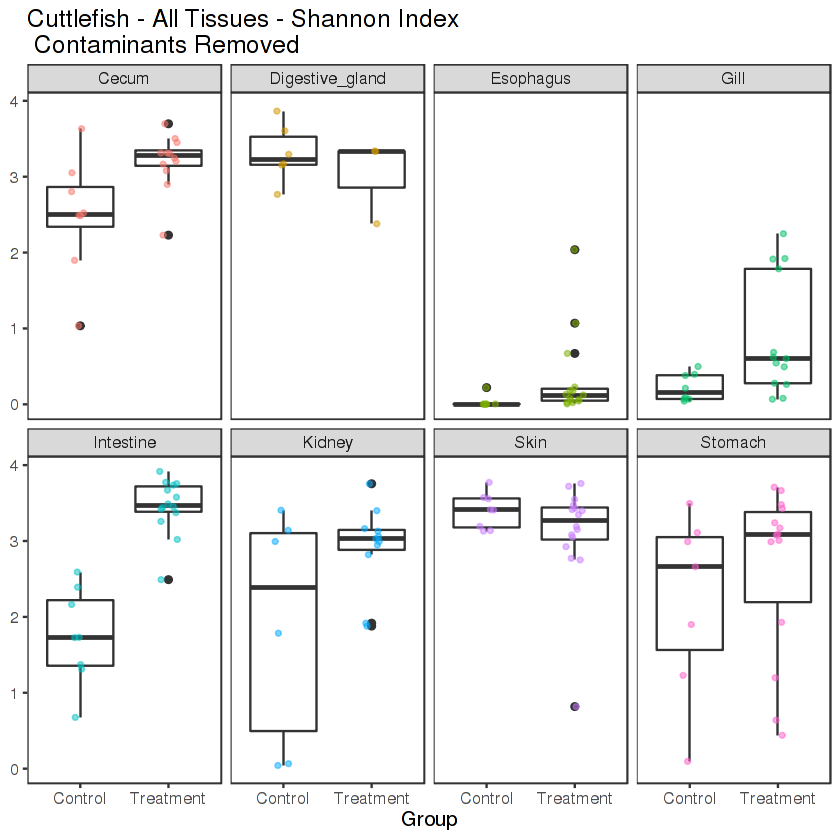

In [38]:
p = ggplot(na.omit(all_tissues.dfsha), aes(x = Group, y = Shannon)) + ggtitle("Cuttlefish - All Tissues - Shannon Index \n Contaminants Removed")
#p = p + scale_y_continuous(0,1000)

p = p + geom_boxplot() + ylab("Shannon Index") #+ coord_flip()

p = p + geom_point(size = 1,alpha=.5, aes(color = SampleType),
                   position = position_jitter(h = 0, w = 0.1))

#p = p + scale_color_manual(values=c("#9999CC","#CC6666", "#66CC99"))




p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap("SampleType", ncol=4)

p


Observed Richness

Note: CF2 - Stomach outlier; removed from analysis

In [29]:
#all_tissues.obv = estimate_richness(diss_nocontam_nt, split = TRUE, measures = "Observed")
#all_tissues.obv$SampleID = rownames(all_tissues.obv)
#write.csv(all_tissues.obv, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/all_tissues_nocontam.obv.csv")
#### For some reason these lines were introducing "X"s in front of SampleID values and messing everything up
#### Had to export csv, manually remove Xs, then re-read in...continuing below

all_tissues.obv = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/all_tissues_nocontam.obv.csv")

all_tissues.dfobv = left_join(all_tissues.obv, sample_tab, on="SampleID")

all_tissues.ordobv = all_tissues.obv %>% group_by("SampleType") %>%
    summarize(med.obv = median(Observed)) %>%
    arrange(desc(med.obv)) %>%
    magrittr::extract2("SampleType")

stats = all_tissues.dfobv %>%
    group_by(Group, SampleType) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) %>%
    arrange(-desc(SampleType))
stats

Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining factors with different levels, coercing to character vector”

Group,SampleType,median,mean,sd,sem
Control,Cecum,42.5,49.250000,15.827192,5.595757
Treatment,Cecum,38.0,41.666667,11.617646,3.353726
Control,Digestive_gland,30.5,39.833333,22.211859,9.067953
Treatment,Digestive_gland,32.0,33.000000,4.582576,2.645751
Control,Esophagus,2.0,6.285714,10.919620,4.127228
Treatment,Esophagus,18.0,19.066667,13.630149,3.519289
Control,Gill,25.5,27.875000,11.331845,4.006412
Treatment,Gill,40.0,37.538462,11.065076,3.068900
Control,Intestine,77.5,72.375000,31.559185,11.157857
Treatment,Intestine,52.0,62.071429,31.066837,8.302961


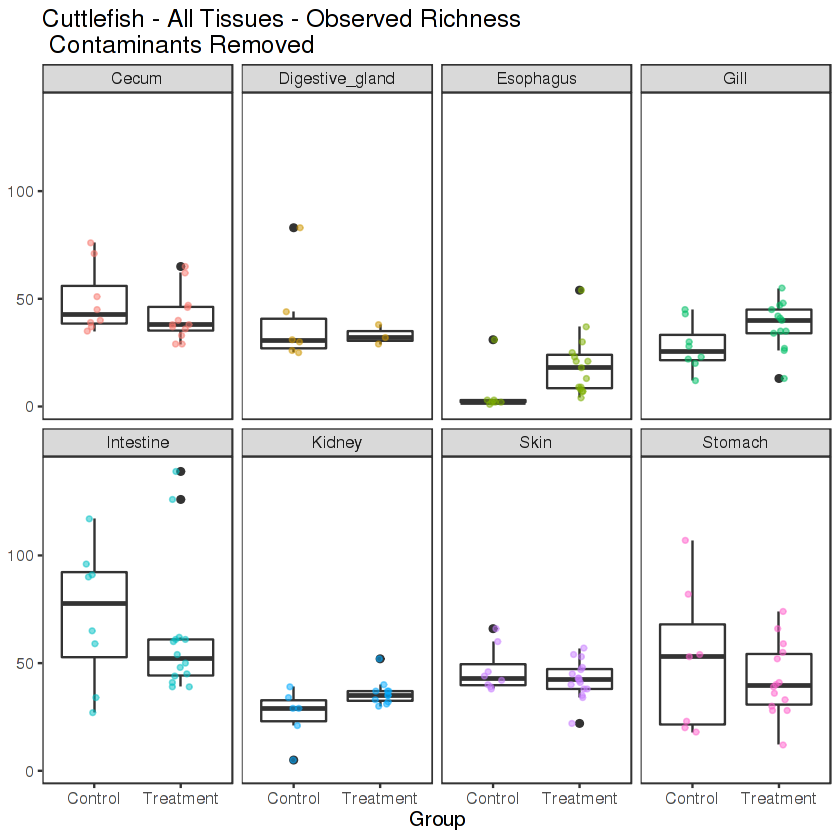

In [30]:
p = ggplot(na.omit(all_tissues.dfobv), aes(x = Group, y = Observed)) + ggtitle("Cuttlefish - All Tissues - Observed Richness \n Contaminants Removed")
#p = p + scale_y_continuous(0,100)

p = p + geom_boxplot() + ylab("Observed Index") #+ coord_flip()

p = p + geom_point(size = 1,alpha=.5, aes(color = SampleType),
                   position = position_jitter(h = 0, w = 0.1))

#p = p + scale_color_manual(values=c("#9999CC","#CC6666", "#66CC99"))




p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           legend.position = "none",
                           axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap("SampleType", ncol=4)

p


In [155]:
write.csv(all_tissues.dfsha, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/all_tissues.dfsha.csv")